## **VISÃO COMPUTACIONAL - AULA 10**

**Objetivos da aula:**

*   apresentar o conceito de wavelet
*   apresentar e praticar com a Transformada de Wavelet
*   praticar com a construção de novas bases de wavelets










**TRANSFORMADA DE WAVELET - TEORIA**

Em Matemática, uma série wavelet é uma representação de uma função de quadrado integrável (valor real ou valor complexo) por certas séries ortonormais geradas por uma ondaleta (wavelet) $\psi$. 

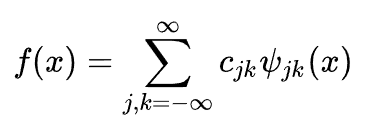

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow

img = cv.imread('series.png')
cv2_imshow(img)

A transformada integral wavelet unidimensional é a transformada integral definida como:

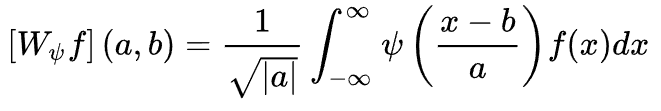

In [10]:
import cv2 as cv
from google.colab.patches import cv2_imshow

img = cv.imread('integral.png')
cv2_imshow(img)

Observe que a forma da transformada é muito parecida com a Transformada de Fourier. Estamos substituindo uma base formada de senos e cossenos ($e^{-i\omega t}$) por uma wavelet. No caso de uma transformada discreta (DWT - Discrete Wavelet Transform), o sinal da integral é substituído por um somatório, assim como ocorreu com a Transformada Discreta de Fourier (DFT).

Uma das bases mais conhecidas de wavelets é a Base de Haar, cuja fórmula e gráfico são mostrados abaixo:

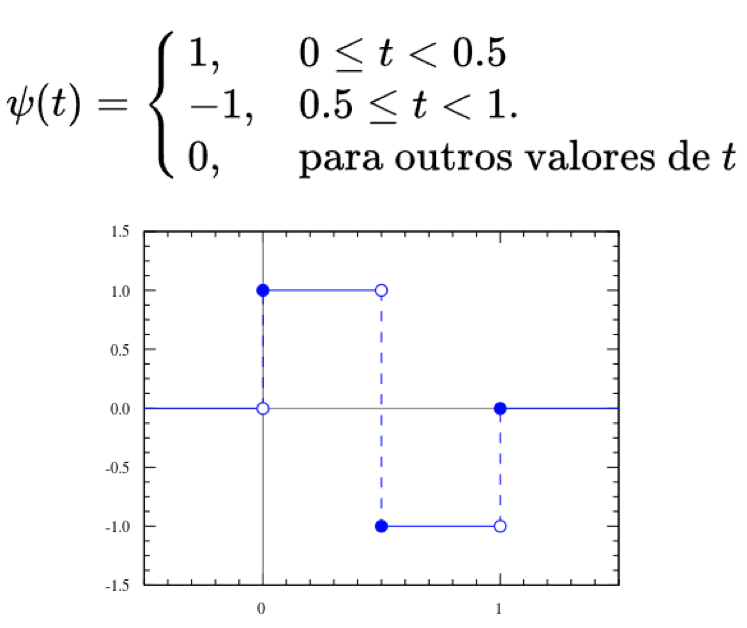

In [11]:
img = cv.imread('haar.png')
cv2_imshow(img)

A Transformada de Wavelet também é uma transformação para o domínio da frequencia. Porém, o resultado da transformação são representações do sinal em combinações de frequencia.

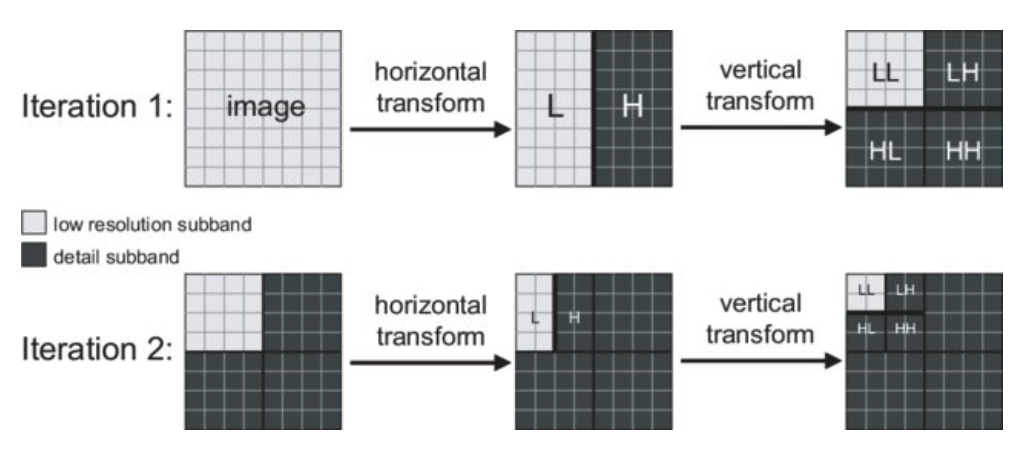

In [12]:
img = cv.imread('transform.png')
cv2_imshow(img)

O resultado da aplicação da transformada de wavelet sobre uma imagem é mostrada a seguir, para diversas iterações. O resultado da primeira iteração é:

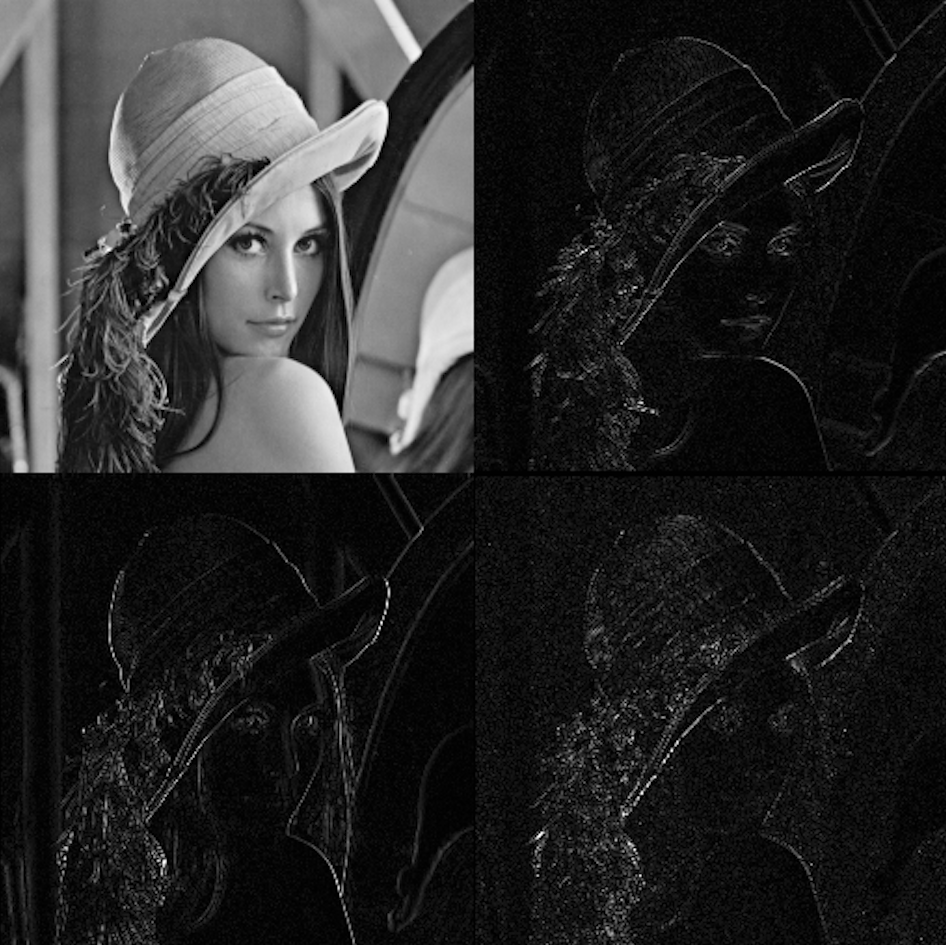

In [14]:
img = cv.imread('lena1.png')
cv2_imshow(img)

O resultado da segunda iteração é:

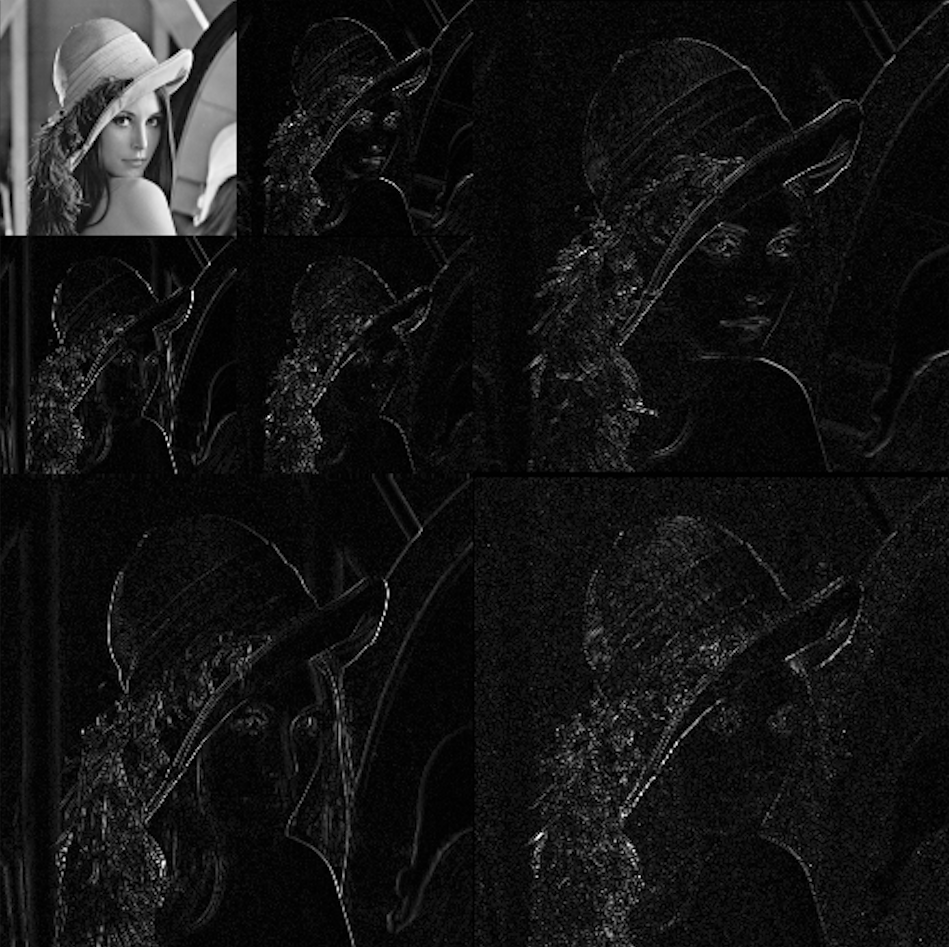

In [15]:
img = cv.imread('lena2.png')
cv2_imshow(img)

O resultado da terceira iteração é:

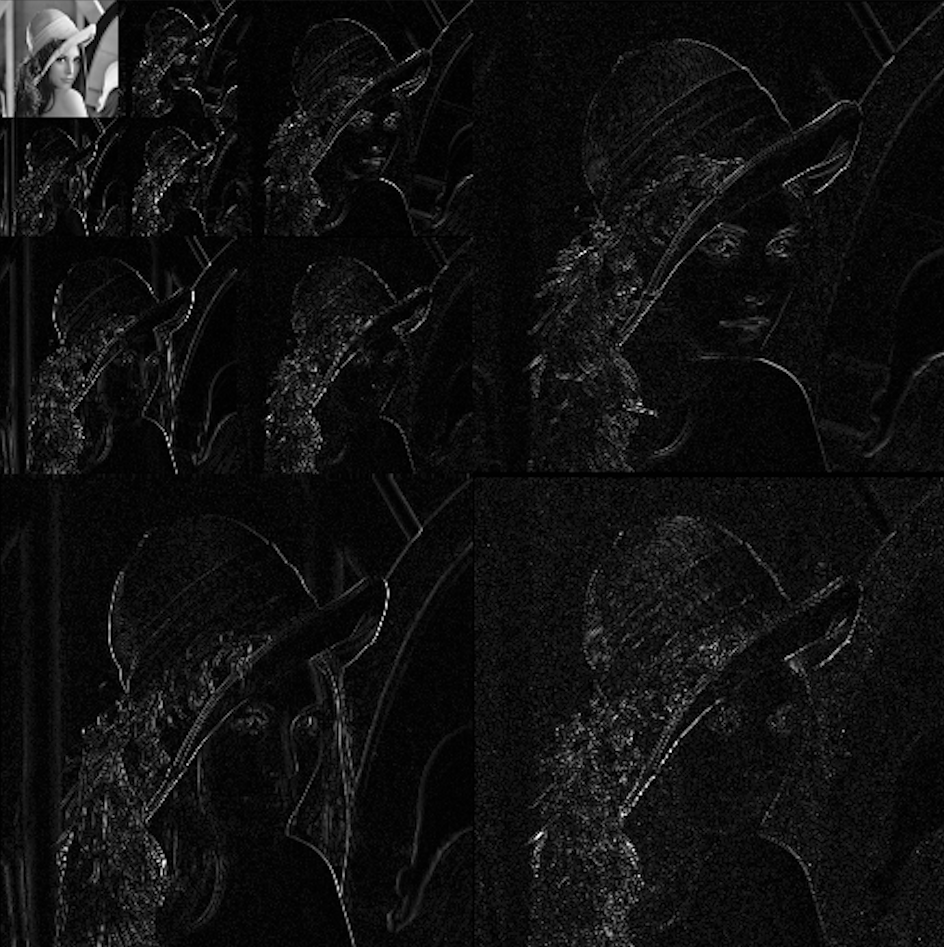

In [16]:
img = cv.imread('lena3.png')
cv2_imshow(img)

Existem diversas bases de wavelets, cada uma com suas características específicas. Abaixo, temos exemplos de famílias de wavelets:

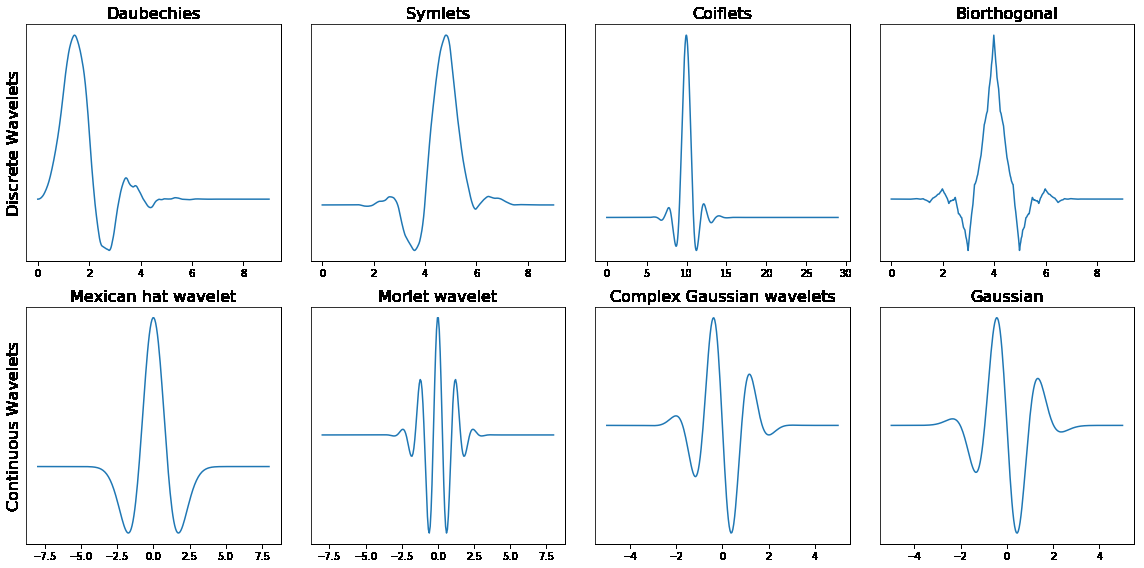

In [17]:
img = cv.imread('basis.png')
cv2_imshow(img)

**TRANSFORMADA DE WAVELET - IMPLEMENTAÇÃO**

Para Python, existem diversas implementações da Transformada de Wavelet. No nosso curso, usaremos a implementação PyWavelets (https://pywavelets.readthedocs.io/en/latest/index.html).

In [ ]:
import pywt
img = cv.cvtColor(cv.imread('lena.png'), cv.COLOR_BGR2GRAY)
coefs = pywt.dwt2(img,'haar')
LL, (LH, HL, HH) = coefs
print(LL.shape,"LL")
cv2_imshow(LL)

In [ ]:
print(LH.shape,"LH")
cv2_imshow(LH)

In [ ]:
print(HL.shape,"HL")
cv2_imshow(HL)

In [ ]:
print(HH.shape,"HH")
cv2_imshow(HH)

**EXERCÍCIO**

Na PyWavelet, existem diversas bases de wavelets já implementadas. Usando a listagem de nomes de bases abaixo, aplique 5 diferentes delas e compare os resultados.

In [ ]:
for family in pywt.families():
  print("%s family: " % family + ', '.join(pywt.wavelist(family)))

w = pywt.Wavelet('haar')
print(w)

In [ ]:
#implemente seu código aqui

**TRANSFORMADA DE INVERSA DE WAVELET - IMPLEMENTAÇÃO**

Assim como aconteceu com a Transformada de Fourier (Contínua ou Discreta), a Transformada de Wavelet também possui uma inversa. Basta termos as componentes de decomposição para remontarmos o sinal original. 

In [ ]:
import pywt
img = cv.cvtColor(cv.imread('lena.png'), cv.COLOR_BGR2GRAY)
cv2_imshow(img)

In [ ]:
coefs = pywt.dwt2(img,'haar')  #análise com Base de Haar
LL, (LH, HL, HH) = coefs
img=pywt.idwt2(coefs,'haar')   #síntese com Base de Haar
cv2_imshow(img)

**EXERCÍCIO**

Faça dois níveis de análise wavelet com a Base de Haar. Suavize a componente LL. Reconstrua a imagem e compare a imagem inicial.

In [ ]:
#implemente sua solução aqui

**IMPLEMENTAÇÃO DE BASES DE WAVELETS**

Quando trabalhamos com a Transformada de Wavelet Discreta, as bases $\psi$ tomam a forma de matriz. Abaixo, temos um exemplo da Base de Haar 2x2.

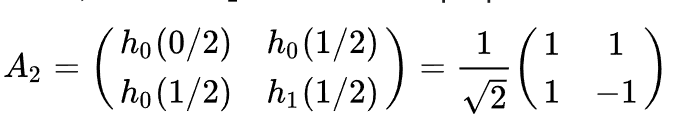

In [36]:
img = cv.imread('haar2x2.png')
cv2_imshow(img)

A implementação desta base pode ser feita através de uma classe em Python:

In [32]:
class HaarFilterBank(object):
  @property
  def filter_bank(self):
    from math import sqrt
    return ([sqrt(2)/2, sqrt(2)/2], [-sqrt(2)/2, sqrt(2)/2],
            [sqrt(2)/2, sqrt(2)/2], [sqrt(2)/2, -sqrt(2)/2])

haar2= pywt.Wavelet('Haar Implementation', filter_bank=HaarFilterBank())


In [ ]:
coefs = pywt.dwt2(img,haar2)  #análise com Base de Haar
LL, (LH, HL, HH) = coefs
cv2_imshow(LL)


**EXERCÍCIO**

Implemente a Base de Haar 4x4 mostrada abaixo. Aplique na imagem da Lena e compare com o resultado da Base de Harr 2x2.

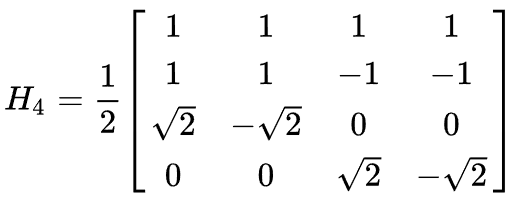

In [37]:
img = cv.imread('haar4x4.png')
cv2_imshow(img)

In [ ]:
#implemente seu código aqui

**TRANSFORMADA RÁPIDA DE WAVELET (FWT)**

Assim como ocorria na FFT (Transformada Rápida de Fourier), também existe uma implementação eficiente da Transformada de Wavelet chamafa FWT (Fast Wavelet Transform), que utiliza um processo de síntese e análise muito eficiente chamado decimação.

Nesta referência, é possível analisar um código completo desta implementação: http://ltfat.github.io/


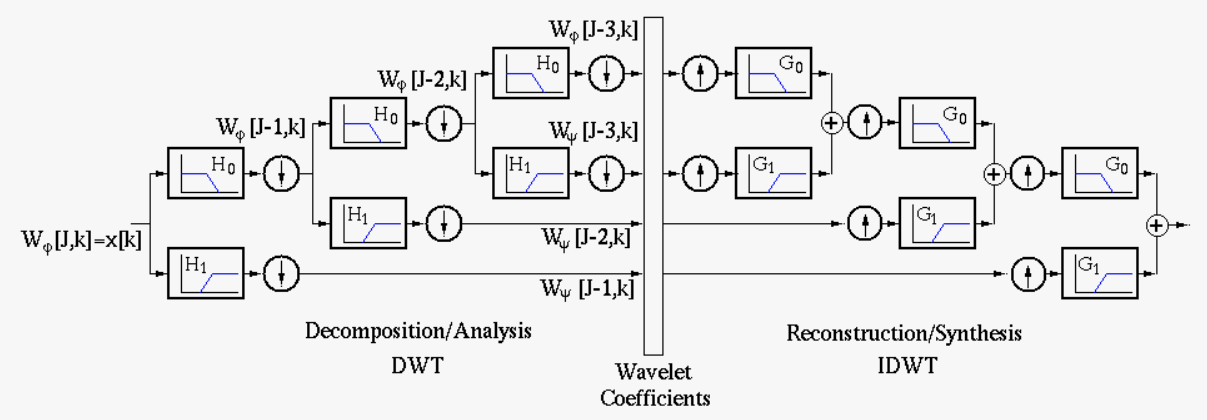

In [3]:
img = cv.imread('FWT.png')
cv2_imshow(img)

**PRÓXIMAS AULAS**

**06/10** - Morfologia Matemática

**08/10** - Atendimento-extra (horário da aula)

**13/10** - Atendimento Normal (08:00 - 09:30)

**13/10** - Prova Intermediária (09:45 - 11:45)